# Figure 2 (and SFig1) -- Visualize task fMRI activation maps (and RDMs)

#### This uses preprocessed fMRI task activation maps (after a task GLM)
#### Due to large file size, only group-averaged task activation maps are provided 

In [1]:
import numpy as np
import nibabel as nib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nilearn.plotting as plotting
from importlib import reload
import wbplot
import matplotlib.image as img 
import os
import h5py
from wbplot.utils.images import Cifti
plt.rcParams['font.sans-serif'] = "Arial"
import matplotlib.colors as clrs
from matplotlib import colorbar

#### Set up basic parameters

In [5]:
figuredir = '../figures/Fig2/'
if not os.path.exists(figuredir): os.makedirs(figuredir)

networkdef = np.loadtxt('cortex_parcel_network_assignments.txt')
# need to subtract one to make it compatible for python indices
indsort = np.loadtxt('cortex_community_order.txt',dtype=int) - 1 
indsort.shape = (len(indsort),1)

# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[indsort]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360

sortednets = np.sort(list(xticks.keys()))
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)
parcel_network_palette = []
for roi in range(nParcels): parcel_network_palette.append(networkpalette[int(networkdef[roi]-1)])

OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

glasserfilename = 'Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii'
glasser = np.squeeze(nib.load(glasserfilename).get_fdata())

    
# Set task ordering
unique_tasks = ['NoGo','Go','TheoryOfMind','VideoActions','VideoKnots','Math',
                'DigitJudgement','Objects','MotorImagery','FingerSimple','FingerSeq',
                'Verbal2Back','SpatialImagery','VerbGen','WordRead','Rest',
                'PermutedRules','SpatialMapEasy','SpatialMapMed','SpatialMapHard',
                'NatureMovie','AnimatedMovie','LandscapeMovie','UnpleasantScenes','PleasantScenes',
                'SadFaces','HappyFaces','Object2Back','IntervalTiming',
                'Prediction','PredictViol','PredictScram','VisualSearchEasy','VisualSearchMed','VisualSearchHard',
                'StroopIncon','StroopCon','MentalRotEasy','MentalRotMed','MentalRotHard',
                'BiologicalMotion','ScrambledMotion','RespAltEasy','RespAltMed','RespAltHard']

task_passivity = ['left','left','left','passive','passive','right',
                  'right','passive','passive','both','both',
                  'left','passive','passive','passive','passive',
                  'both','both','both','both',
                  'passive','passive','passive','left','left',
                  'right','right','right','right',
                  'left','left','left','left','left','left',
                  'both','both','right','right','right',
                  'right','right','both','both','both']

cognitive_tasks = ['Go, No-go', 'Go, No-go', 'Theory of mind', 'Action observation', 'Action observation', 'Arithmetic',
                   'Arithmetic', 'Object viewing', 'Motor imagery', 'Motor sequence', 'Motor sequence',
                   'Verbal working memory', 'Spatial imagery', 'Verb generation', 'Verb generation', 'Rest',
                   'CPRO', 'Spatial map', 'Spatial map', 'Spatial map',
                   'Nature movie', 'Animated movie', 'Landscape movie', 'IAPS affective', 'IAPS affective',
                   'IAPS emotion', 'IAPS emotion', 'Object n-back', 'Interval timing', 
                   'Word prediction', 'Word prediction', 'Word prediction', 'Visual search', 'Visual search', 'Visual search',
                   'Stroop', 'Stroop', 'Mental rotation', 'Mental rotation', 'Mental rotation',
                   'Biological motion', 'Biological motion', 'Response alternatives', 'Response alternatives', 'Response alternatives']

# sort tasks by passivity
unique_tasks = np.asarray(unique_tasks)
task_passivity = np.asarray(task_passivity)
unique_tasks2 = []
passivity_order = ['passive','left','right','both']
for i in passivity_order:
    ind = np.where(task_passivity==i)[0]
    unique_tasks2.extend(unique_tasks[ind])

unique_tasks = np.asarray(unique_tasks2)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0.4, 1, 128)),
                       bottom(np.linspace(0, 0.6, 128))))

newcmp = ListedColormap(newcolors[::-1], name='OrangeBlue')

# Load task activation data (vertex)

In [8]:
task26_labels = np.unique(cognitive_tasks)

h5f = h5py.File('../processed_data/analysis2/analysis5_averaged_task_activation_data_group.h5','r')
group_26tasks = h5f['data'][:].copy()
h5f.close()

#### Plot to surface using wbplot

In [9]:
for i in range(group_26tasks.shape[0]):
    vmin = np.min(group_26tasks[i,:59412])
    vmax = np.min(group_26tasks[i,:59412])
    max_val = np.max([np.abs(vmin),np.abs(vmax)])
    group_26tasks[i,:59412] = group_26tasks[i,:59412]/max_val

i = 0
for task in task26_labels:
    wbplot.dscalar(figuredir + 'Vertex' + task + '.png',group_26tasks[i,:59412],palette='cool-warm')
    i += 1


Info: Time to read /var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/HumanCorticalParcellations/S1200.L.flat.32k_fs_LR.surf.gii was 0.061882 seconds.


Info: Time to read /var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/HumanCorticalParcellations/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.017764 seconds.


Info: Time to read /var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/HumanCorticalParcellations/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii was 0.034405 seconds.


Info: Time to read /var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/HumanCorticalParcellations/S1200.L.very_inflated_MSMAll.32k_fs_LR.surf.gii was 0.02477 seconds.


Info: Time to read /var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/HumanCorticalParcellations/S1200.R.flat.32k_fs_LR.surf.gii was 0.053886 seconds.


Info: Time to read /var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/HumanCorticalParcellations/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.01749 seconds.


Info: Time to read /var/folders/j_/sqyl0rs

#### Visualize - note that all maps are not scaled accordingly

/var/folders/j_/sqyl0rss2cj2rbvf8gs3q1nh5b6ztc/T/ipykernel_88824/3781398655.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(1.2,1.2))


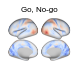

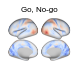

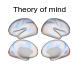

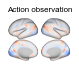

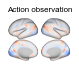

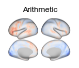

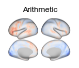

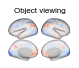

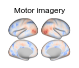

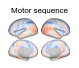

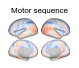

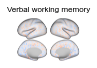

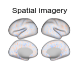

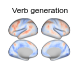

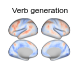

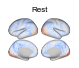

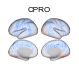

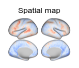

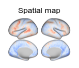

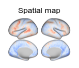

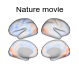

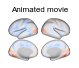

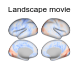

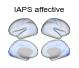

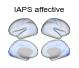

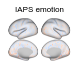

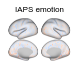

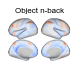

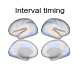

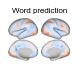

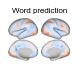

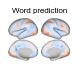

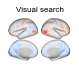

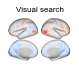

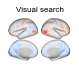

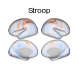

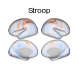

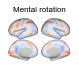

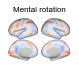

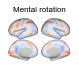

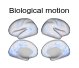

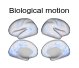

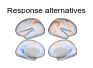

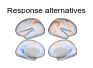

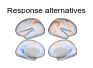

In [10]:
tasks_to_print = ['Arithmetic', 'Go, No-go', 'Motor imagery', 'Nature movie', 'Object n-back', 
             'Visual search', 'Mental rotation','Verb generation', 'Word prediction', 
             'Stroop','Object viewing', 'Landscape movie']
# For supplement
tasks_to_print = cognitive_tasks
for task in tasks_to_print:
    im = img.imread(figuredir + 'Vertex' + task + '.png') 
    plt.figure(figsize=(1.2,1.2))
    plt.imshow(im)
    plt.axis('off')
    plt.title(task,fontsize=8)
    plt.tight_layout()
    plt.savefig(figuredir + 'Vertex' + task + '_cmap.png',dpi=300)